### Due Date 16/2/24

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import re #RegEx - Regular expression library
import nltk #Natural language  #Additional library such as Vader/TextBlob
nltk.download('stopwords') #eg: a, the, and
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer #love, lovable, loving

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Import Dataset

In [ ]:
df = pd.read_csv('consumer-review.csv', encoding='ISO-8859-1')


In [ ]:
df

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34655,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-09-18T00:00:00Z,NaN,2015-08-29T00:00:00Z,...,NaN,NaN,NaN,3.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,This is not appreciably faster than any other ...,Not appreciably faster than any other 1.8A cha...,NaN,NaN,Kris
34656,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-11-21T00:00:00Z,NaN,2015-09-02T00:00:00Z,...,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,Amazon should include this charger with the Ki...,Should be included,NaN,NaN,Jonathan Stewart
34657,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-10-19T00:00:00Z,NaN,2015-09-04T00:00:00Z,...,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,Love my Kindle Fire but I am really disappoint...,Disappointing Charger,NaN,NaN,J Lawson
34658,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Ser

In [ ]:
df.dtypes

id                       object
name                     object
asins                    object
brand                    object
categories               object
keys                     object
manufacturer             object
reviews.date             object
reviews.dateAdded        object
reviews.dateSeen         object
reviews.didPurchase      object
reviews.doRecommend      object
reviews.id              float64
reviews.numHelpful      float64
reviews.rating          float64
reviews.sourceURLs       object
reviews.text             object
reviews.title            object
reviews.userCity        float64
reviews.userProvince    float64
reviews.username         object
dtype: object

In [ ]:
df = df[['name','reviews.text','reviews.doRecommend','reviews.numHelpful']] #select specific column

In [ ]:
df.shape

(34660, 4)

In [ ]:
df.head(5)

,name,reviews.text,reviews.doRecommend,reviews.numHelpful
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...,True,0.0
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...,True,0.0
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...,True,0.0
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I've had my Fire HD 8 two weeks now and I love...,True,0.0
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I bought this for my grand daughter when she c...,True,0.0


In [ ]:
df.isnull().sum()

name                   6760
reviews.text              1
reviews.doRecommend     594
reviews.numHelpful      529
dtype: int64

There are missing values in those columns. Since we have 34660 rows, so we can just remove the entire rows which has missing values.

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

name                   0
reviews.text           0
reviews.doRecommend    0
reviews.numHelpful     0
dtype: int64

Now, there is no missing values

In [ ]:
df.shape

(27409, 4)

To ensure the dataset only contains product with at least 1000 reviews

In [ ]:
df = df.groupby('name').filter(lambda x: len(x) >= 1000)

print("Number of products with at least 1000 reviews: ", len(df['name'].unique()))


Number of products with at least 1000 reviews:  7


So there is 7 products now with at least 1000 reviews.

Now, we change the data types for doRecommend and numHelpful columns, since it is invalid data types.

In [ ]:
df['reviews.doRecommend'] = df['reviews.doRecommend'].astype(int)
df['reviews.numHelpful'] = df['reviews.numHelpful'].astype(int)

In [ ]:
df.head(5)

,name,reviews.text,reviews.doRecommend,reviews.numHelpful
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...,1,0
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...,1,0
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...,1,0
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I've had my Fire HD 8 two weeks now and I love...,1,0
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I bought this for my grand daughter when she c...,1,0


In [ ]:
df['name'].unique()

array(['All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta',
       'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta',
       'Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue,,,',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case',
       'Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,,,',
       'Echo (White),,,\r\nEcho (White),,,',
       'Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,'], dtype=object)

So here the remaining product type name with at least 1000 reviews. However, some product type name is repeated by three consecutive commas

In [ ]:
df['name'] = df['name'].apply(lambda x:x.split(',,,')[0])

In [ ]:
df['name'].unique()

array(['All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta',
       'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta',
       'Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case',
       'Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black',
       'Echo (White)', 'Amazon Fire Tv'], dtype=object)

Now, the 'name' column is goes well

We can start to remove punctuation, symbols for second column 'reviews.text'

In [ ]:
ps = PorterStemmer()

def preprocess_text(review):
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    return ' '.join(review)

df['clean_reviews'] = df['reviews.text'].apply(preprocess_text)

In [ ]:
# Remove all words that contain numbers
df['clean_reviews'] = df['clean_reviews'].apply(lambda x: re.sub('\w*\d\w*', '', x))


In [ ]:
print(clean_reviews)

0        product far disappoint children love use like ...
1           great beginn experienc person bought gift love
2        inexpens tablet use learn step nabi thrill lea...
3        fire hd two week love tablet great valu prime ...
4        bought grand daughter come visit set user ente...
                               ...                        
25483    mani use listen music check weather listen pod...
25484    cost outrag easi setup fun use sync iphon blue...
25485    knew crowd fund start wish jump board excel pl...
25486    neat product fit need sever bluetooth devic co...
25487           respons well lot skill ad increas function
Length: 25488, dtype: object


In [ ]:
df_grouped=df[['name','clean_reviews']].groupby(by='name').agg(lambda x:' '.join(x))
df_grouped.head()

,clean_reviews
name,
"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",product far disappoint children love use like ...
Amazon Fire Tv,echo learn everyday use daili use place speake...
Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,nice littl set slow wish would investig littl ...
Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue,best valu money hand work perfectli purchas da...
Echo (White),although compet ipad higher end android tablet...


Creating a Bag-of-Words Model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate CountVectorizer without specifying max_features
cv = CountVectorizer()

# Fit and transform the 'clean_reviews' column and convert the result to an array
X = cv.fit_transform(df['clean_reviews']).toarray()

# Assuming that the second column of your DataFrame is the target variable
y = df.iloc[:, 4].values

In [ ]:
print(y)

['product far disappoint children love use like abil monitor control content see eas'
 'great beginn experienc person bought gift love'
 'inexpens tablet use learn step nabi thrill learn skype alreadi' ...
 'knew crowd fund start wish jump board excel platform start home autom entertain valu welcom bonu even year old mother law use sound qualiti great listen rang amaz tell alexa turn connect light upstair upstair note work googl play yet hope futur'
 'neat product fit need sever bluetooth devic could recogn return might good other work work ok'
 'respons well lot skill ad increas function']


Generate wordcloud based on 7 products

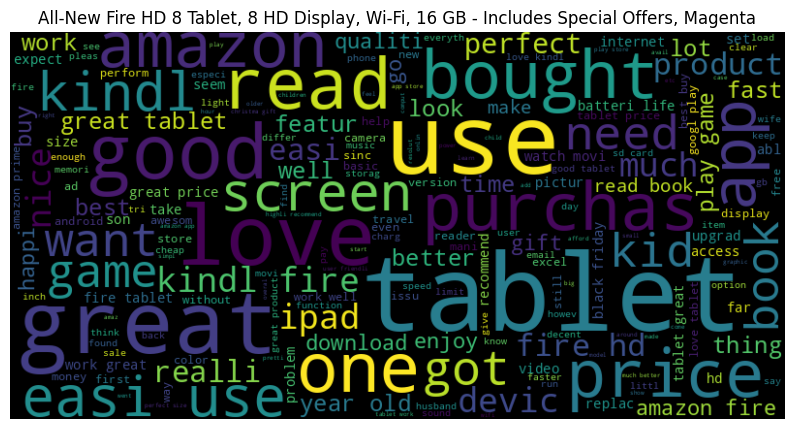

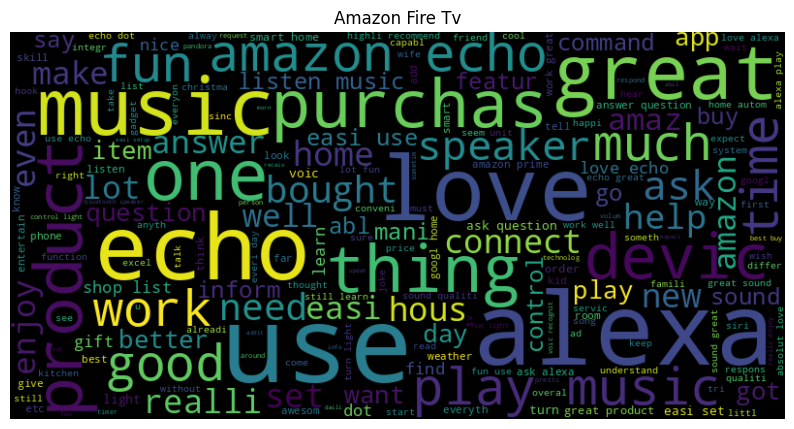

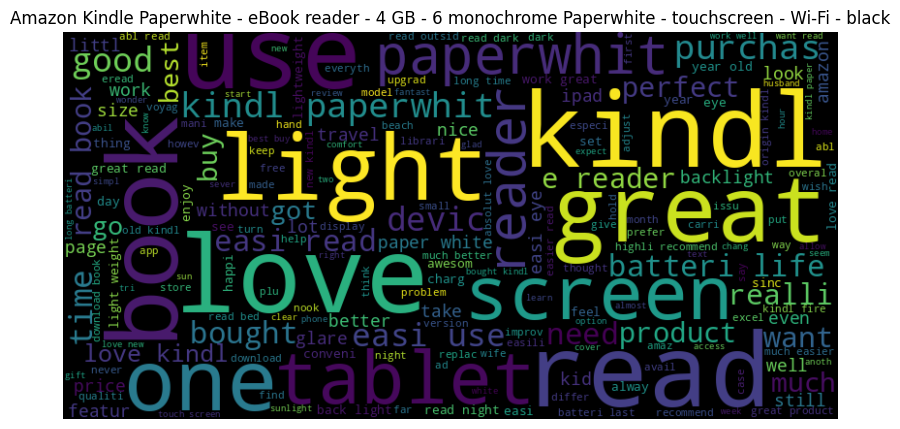

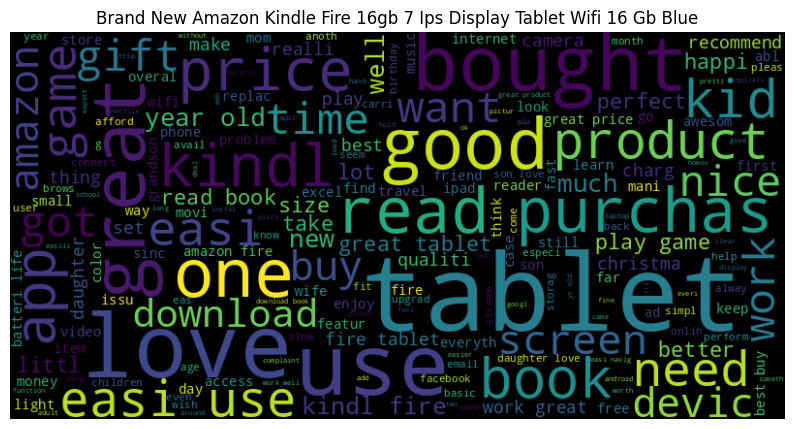

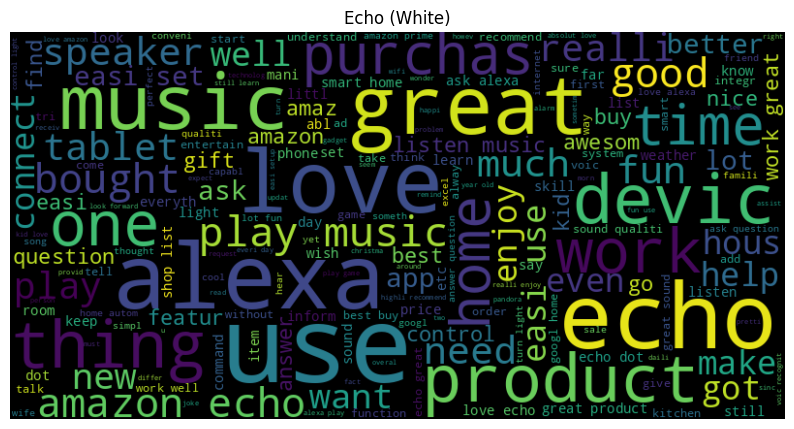

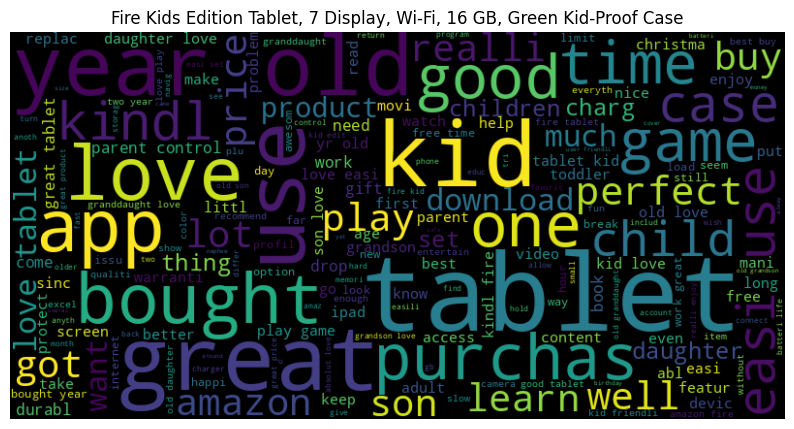

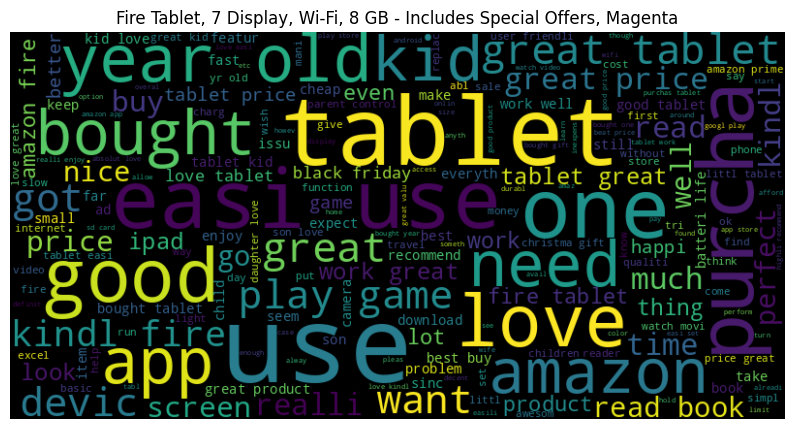

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Group the DataFrame by the 'name' column and join the 'clean_reviews' into a single string for each group
grouped = df.groupby('name')['clean_reviews'].apply(' '.join)

# Generate a word cloud for each unique name
for name, reviews in grouped.items():
    wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(reviews)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(name)
    plt.show()


Based on the result, we can see that LOVE, USE, GOOD, GREAT, BROUGHT, and EASY are the most frequently occurring words for almost all of the 7 product types. Meaning majority of the users love the products from the company and have a good experience on it. We can see that the products is also easy to use for their users.

In [ ]:
from textblob import TextBlob
df['polarity']=df['clean_reviews'].apply(lambda x:TextBlob(x).sentiment.polarity)
df.head()

,name,reviews.text,reviews.doRecommend,reviews.numHelpful,clean_reviews,polarity
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...,1,0,product far disappoint children love use like ...,0.300000
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...,1,0,great beginn experienc person bought gift love,0.650000
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...,1,0,inexpens tablet use learn step nabi thrill lea...,0.000000
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I've had my Fire HD 8 two weeks now and I love...,1,0,fire hd two week love tablet great valu prime ...,0.295455
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I bought this for my grand daughter when she c...,1,0,bought grand daughter come visit set user ente...,0.500000


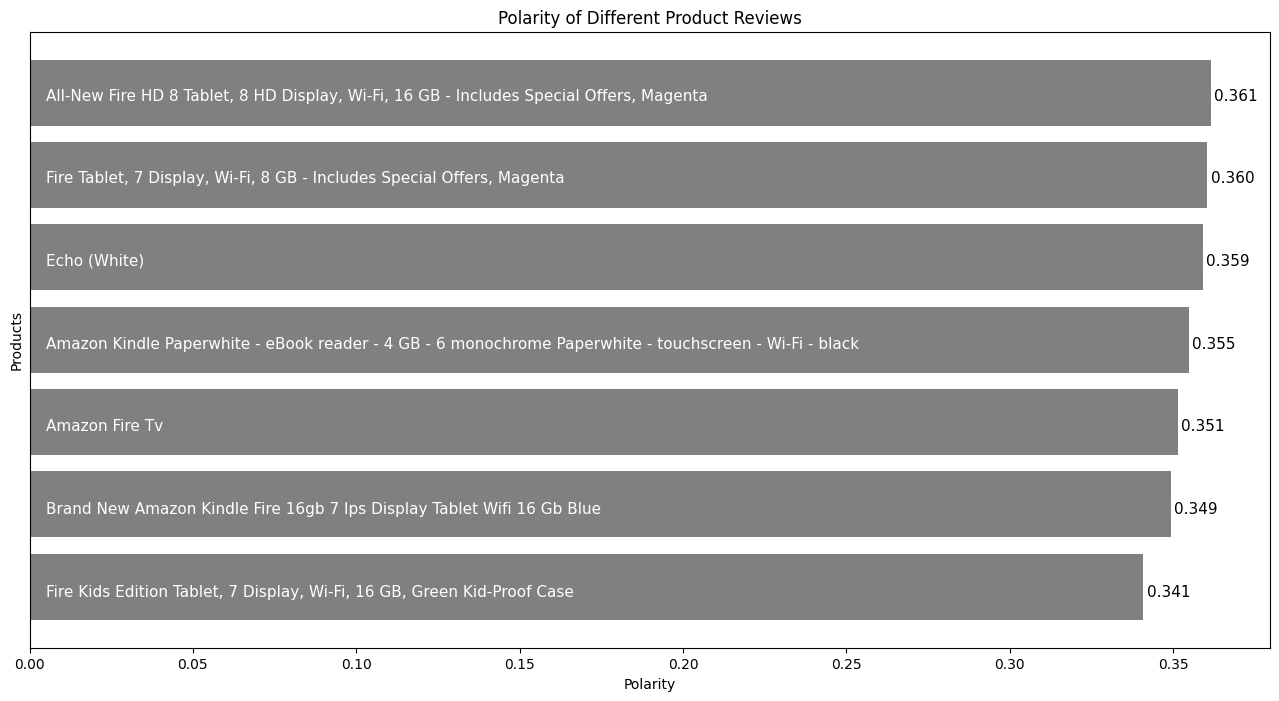

In [ ]:

product_polarity_sorted=pd.DataFrame(df.groupby('name')['polarity'].mean().sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Polarity')
plt.ylabel('Products')
plt.title('Polarity of Different Product Reviews')
polarity_graph=plt.barh(np.arange(len(product_polarity_sorted.index)),product_polarity_sorted['polarity'],color='grey',)

# Writing product names on bar
for bar,product in zip(polarity_graph,product_polarity_sorted.index):
  plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(product),va='center',fontsize=11,color='white')

# Writing polarity values on graph
for bar,polarity in zip(polarity_graph,product_polarity_sorted['polarity']):
  plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='center',fontsize=11,color='black')

plt.yticks([])
plt.show()

The polarity score determines whether the sentiment is positive, negative, or neutral.

* Positive Polarity: If the polarity score is greater than 0, the sentiment is considered positive. This means the text expresses a positive or favorable opinion.

* Negative Polarity: If the polarity score is less than 0, the sentiment is considered negative. This means the text expresses a negative or unfavorable opinion.

* Neutral Polarity: If the polarity score is exactly 0, the sentiment is considered neutral. This means the text does not express a positive or negative opinion.

* Based on the graph, since we are just taken the average polarity, we can observe that all the products have a positive polarity score, which means the reviews are generally positive.
* The product with the highest polarity score is “All New Fire HD 8 Tablet, 8” HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta" with a score of approximately 0.361, indicating very positive reviews.
* Whereas the product with the lowest polarity score is “Fire Kids Edition Tablet, 7” Display, Wi-Fi, 16 GB, Green Kid-Proof Case" with a score of approximately 0.341, but this is still a positive score, indicating that the reviews are more positive than negative.

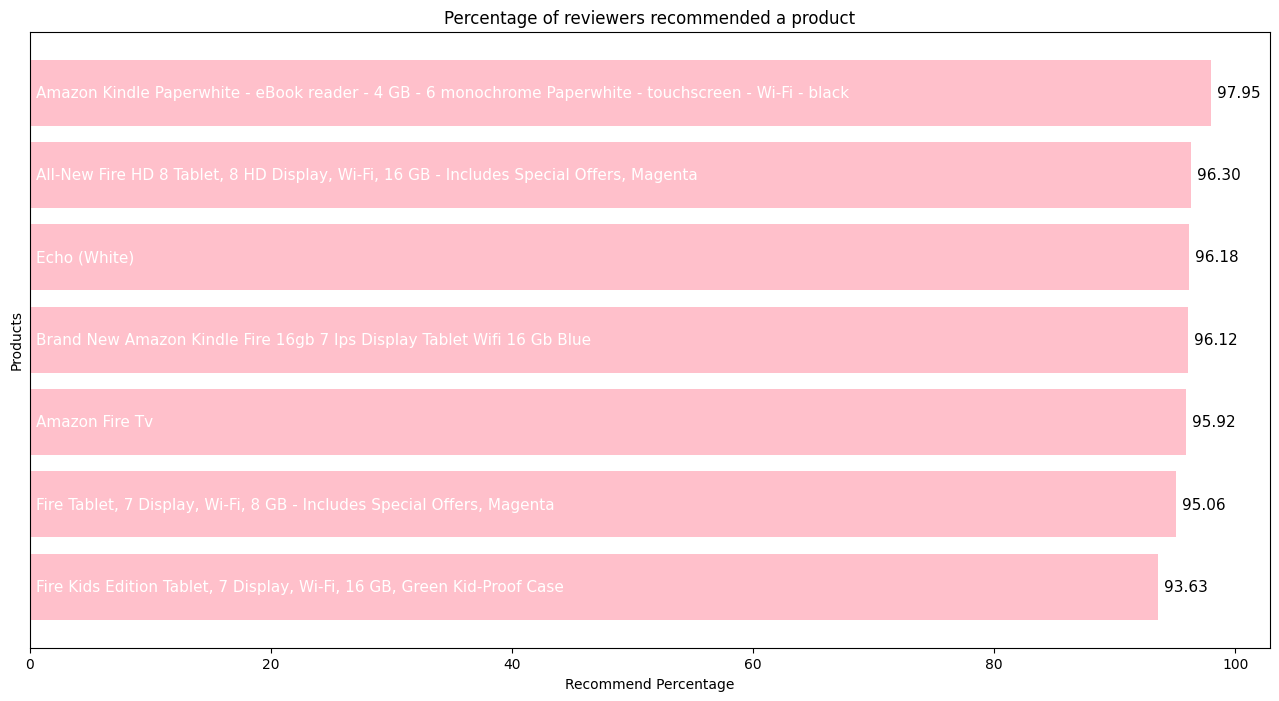

In [ ]:
recommend_percentage=pd.DataFrame(((df.groupby('name')['reviews.doRecommend'].sum()*100)/df.groupby('name')['reviews.doRecommend'].count()).sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Recommend Percentage')
plt.ylabel('Products')
plt.title('Percentage of reviewers recommended a product')
recommend_graph=plt.barh(np.arange(len(recommend_percentage.index)),recommend_percentage['reviews.doRecommend'],color='pink')

# Writing product names on bar
for bar,product in zip(recommend_graph,recommend_percentage.index):
  plt.text(0.5,bar.get_y()+0.4,'{}'.format(product),va='center',fontsize=11,color='white')

# Writing recommendation percentage on graph
for bar,percentage in zip(recommend_graph,recommend_percentage['reviews.doRecommend']):
  plt.text(bar.get_width()+0.5,bar.get_y()+0.4,'%.2f'%percentage,va='center',fontsize=11,color='black')

plt.yticks([])
plt.show()

Based on the result, the product of Fire Kids Edition Tablet has the lowest recommendation percentage and lowest polarity for reviews. Therefore, the polarity of reviews will affect the product to get recommended by users.

#Findings:
1. Customers love products from this company. Majority of them purchase products with good experience.
2. The prodcuts from the company is ease to use.
3. Based on the graph, since we are just taken the average polarity, we can observe that all the products have a positive polarity score, which means the reviews are generally positive.
4. The company need to improve on the product of the Fire Kids Edition Tablet because it has the lowest polarity score and least recommended product.
